# PHASE1

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# analyse exploratoire des données

In [10]:
# Charger les données de la première phase
df = pd.read_csv('Phase1.csv', sep=',')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13599 non-null  int64  
 1   duration                     13599 non-null  int64  
 2   protocol_type                13599 non-null  object 
 3   service                      13599 non-null  object 
 4   flag                         13599 non-null  object 
 5   src_bytes                    13599 non-null  int64  
 6   dst_bytes                    13599 non-null  int64  
 7   land                         13599 non-null  int64  
 8   wrong_fragment               13599 non-null  int64  
 9   urgent                       13599 non-null  int64  
 10  hot                          13599 non-null  int64  
 11  num_failed_logins            13599 non-null  int64  
 12  logged_in                    13599 non-null  int64  
 13  num_compromised 

In [12]:
df.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,13599.000000,13599.000000,1.359900e+04,1.359900e+04,13599.000000,13599.000000,13599.0,13599.000000,13599.000000,13599.000000,...,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000
mean,12495.645636,182.747776,1.164666e+04,4.352227e+03,0.000074,0.001177,0.0,0.222149,0.001177,0.701669,...,149.209795,187.626664,0.803486,0.041635,0.121749,0.025695,0.021073,0.013594,0.046417,0.044595
std,7333.313621,1371.063164,1.723699e+05,6.941981e+04,0.008575,0.058150,0.0,2.340105,0.043711,0.457542,...,101.645694,94.248057,0.331422,0.130418,0.255221,0.068712,0.122787,0.101307,0.195325,0.191117
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6113.500000,0.000000,1.050000e+02,8.100000e+01,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,41.000000,110.000000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12521.000000,0.000000,2.320000e+02,3.700000e+02,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,161.000000,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18848.000000,0.000000,3.240000e+02,2.009000e+03,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,255.000000,255.000000,1.000000,0.020000,0.080000,0.030000,0.000000,0.000000,0.000000,0.000000
max,25186.000000,36613.000000,7.665876e+06,5.131424e+06,1.000000,3.000000,0.0,77.000000,3.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Les valeurs manquantes
df.isnull().sum()

Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

<AxesSubplot:>

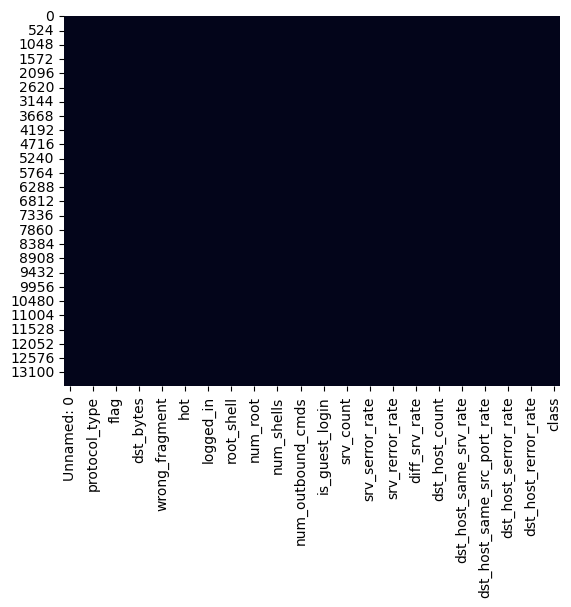

In [14]:
# Sous forme de carte thermique
sns.heatmap(df.isnull(), cbar=False)

In [21]:
# Données redondantes
MatrixCorrélations = df.corr()

In [22]:
# Trouver les paires de colonnes avec des corrélations (supérieures à 0,5)
CorrélationsPairs = []
for i in range(len(MatrixCorrélations.columns)):
    for j in range(i):
        if abs(MatrixCorrélations.iloc[i, j]) > 0.5:
            CorrélationsPairs.append((MatrixCorrélations.columns[i], MatrixCorrélations.columns[j]))

# Afficher les paires de colonnes avec des corrélations
for pair in CorrélationsPairs:
    print(pair)


('root_shell', 'num_compromised')
('su_attempted', 'num_compromised')
('su_attempted', 'root_shell')
('num_root', 'num_compromised')
('num_root', 'root_shell')
('num_root', 'su_attempted')
('num_access_files', 'num_compromised')
('num_access_files', 'su_attempted')
('num_access_files', 'num_root')
('is_guest_login', 'hot')
('srv_count', 'count')
('srv_serror_rate', 'serror_rate')
('srv_rerror_rate', 'rerror_rate')
('diff_srv_rate', 'same_srv_rate')
('dst_host_same_srv_rate', 'dst_host_srv_count')
('dst_host_diff_srv_rate', 'dst_host_srv_count')
('dst_host_diff_srv_rate', 'dst_host_same_srv_rate')
('dst_host_serror_rate', 'serror_rate')
('dst_host_serror_rate', 'srv_serror_rate')
('dst_host_srv_serror_rate', 'serror_rate')
('dst_host_srv_serror_rate', 'srv_serror_rate')
('dst_host_srv_serror_rate', 'dst_host_serror_rate')
('dst_host_rerror_rate', 'rerror_rate')
('dst_host_rerror_rate', 'srv_rerror_rate')
('dst_host_srv_rerror_rate', 'rerror_rate')
('dst_host_srv_rerror_rate', 'srv_rerro

<AxesSubplot:>

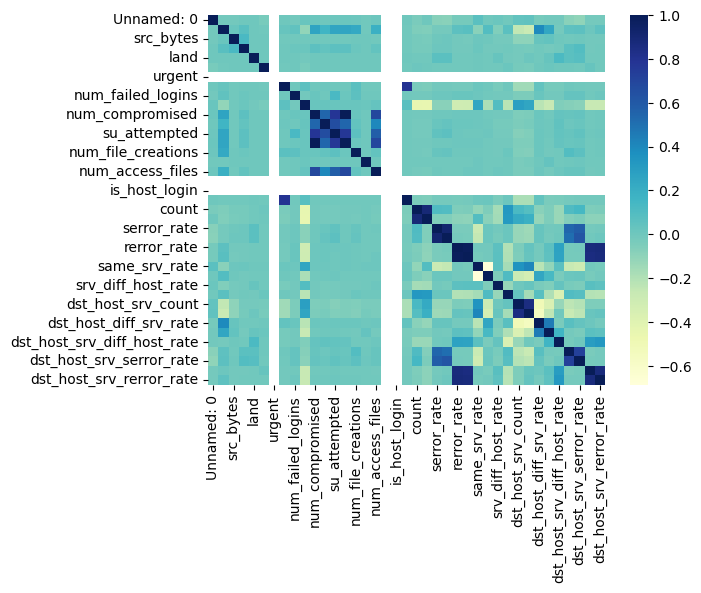

In [24]:
sns.heatmap(MatrixCorrélations, cmap="YlGnBu")

In [26]:
# Transformations des données
from sklearn.preprocessing import MinMaxScaler


In [27]:
Scl = MinMaxScaler()
DfNorm = Scl.fit_transform(df)

ValueError: could not convert string to float: 'tcp'

In [28]:
dfNum = df.select_dtypes(include=['float64', 'int64'])
Scl = MinMaxScaler()
DfNorm = Scl.fit_transform(dfNum)

(array([1.3373e+04, 9.4000e+01, 6.4000e+01, 4.3000e+01, 1.5000e+01,
        5.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  3661.3,  7322.6, 10983.9, 14645.2, 18306.5, 21967.8,
        25629.1, 29290.4, 32951.7, 36613. ]),
 <BarContainer object of 10 artists>)

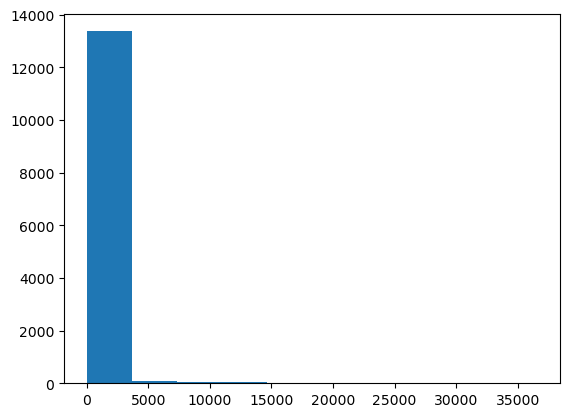

In [29]:
# Analyse de la distribution des données de la colonn duration
plt.hist(df['duration'])


(array([10807.,     0.,     0.,     0.,     0.,  2513.,     0.,     0.,
            0.,   279.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

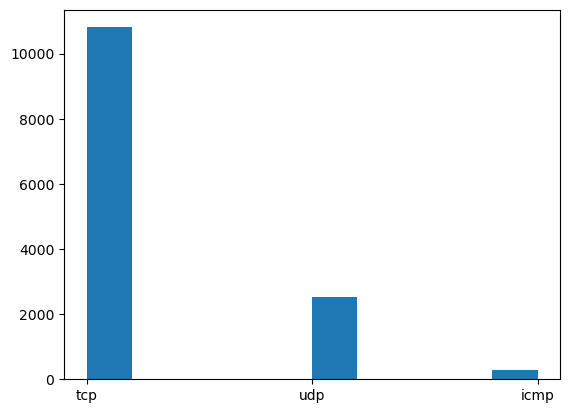

In [31]:
# Analyse de la distribution des données de la colonn protocol_type
plt.hist(df['protocol_type'])

(array([1.1128e+04, 2.0560e+03, 2.4700e+02, 8.8000e+01, 2.8000e+01,
        1.6000e+01, 1.3000e+01, 9.0000e+00, 6.0000e+00, 8.0000e+00]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

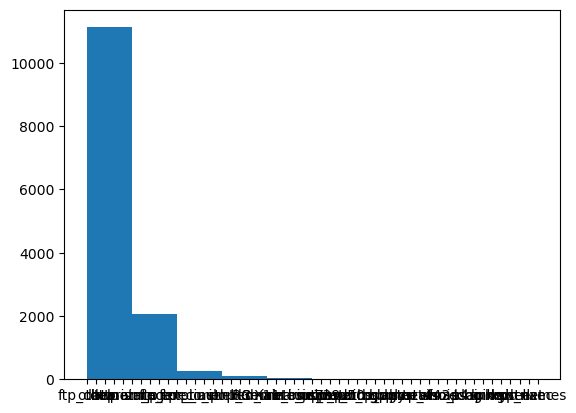

In [32]:
# Analyse de la distribution des données de la colonn service
plt.hist(df['service'])

(array([1.2693e+04, 5.4000e+02, 4.6000e+01, 1.6400e+02, 8.6000e+01,
        3.5000e+01, 1.5000e+01, 1.7000e+01, 1.0000e+00, 2.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

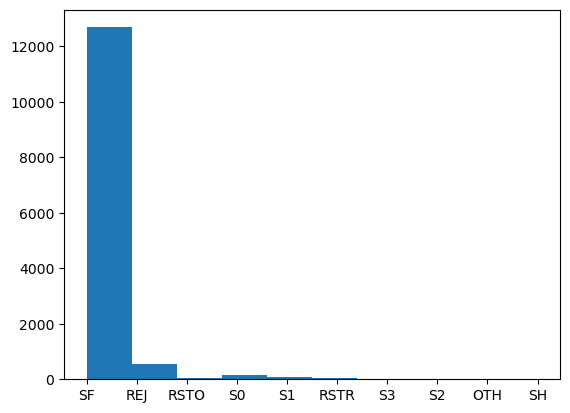

In [34]:
# Analyse de la distribution des données de la colonn flag
plt.hist(df['flag'])

In [51]:
#sns.pairplot(df)

<BarContainer object of 2 artists>

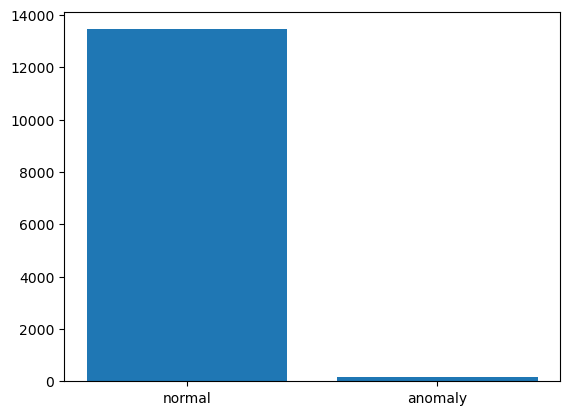

In [52]:
#  un déséquilibre dans les données 
plt.bar(df['class'].unique(), df['class'].value_counts())

# algorithme d'apprentissage supervisé pour détecter les anomalies.

In [209]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [238]:
from sklearn.model_selection import train_test_split
X = df.select_dtypes(include=['float64', 'int64']).iloc[:,:-1] #Récupérer toutes les lignes et toutes les colonnes sauf la dernière colonne de la base
y = df['class'].replace({'anomaly': 1, 'normal': 0}) #Récupérer la colonne class 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_params={
    'n_neighbors':[3,5,7,9,11],
    'metric':['euclidean','manhattan']
}

#Créer un objet grid search avec les paramètres et le modèle à tester
gs=GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv=3 #nombre de folds dans la cross validation
)
gs_results=gs.fit(X_train, y_train) #lancer le grid search et la cross validation

In [239]:
gs_results.best_params_ #Afficher les meilleurs paramètres trouvés

{'metric': 'manhattan', 'n_neighbors': 3}

In [240]:
#Créer une instance knn avec les paramètres optimaux trouvés
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3,metric='manhattan')
#Lancer l'apprentissage
knn.fit(X_train, y_train)#entraîner le modèles
y_pred=knn.predict(X_test) #evaluer le modèles

In [242]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calcul l'accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy : {accuracy}")
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy : 0.9974264705882353
Precision: 0.9975927619415327
Recall: 0.9974264705882353
F1 Score: 0.9974870271709205


In [243]:
#Afficher la matrice de confusion
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2685,    5],
       [   2,   28]], dtype=int64)

# Une fonction qui permet de calculer le nombre de vrai positif, faux positif, vrai négatif et faux négatif dans un ensemble de données.

In [271]:
def CaNombreVF(y_true, y_pred):
    
    # initialisation des variables
    tp = 0  # vrai positif
    fp = 0  # faux positif
    tn = 0  # vrai négatif
    fn = 0  # faux négatif
    
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
    
    
    return tp, fp, tn, fn


In [274]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
X = df.select_dtypes(include=['float64', 'int64']).iloc[:,:-1] #Récupérer toutes les lignes et toutes les colonnes sauf la dernière colonne de la base
y = df['class'].replace({'anomaly': 1, 'normal': 0}) #Récupérer la colonne class 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# the model fit
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# reset the indices of y_test and y_pred
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

# calculer la matrice de confusion
tp, fp, tn, fn = CaNombreVF(y_test, y_pred)

# afficher les résultats
print("Vrai positif : ", tp)
print("Faux positif : ", fp)
print("Vrai négatif : ", tn)
print("Faux négatif : ", fn)

Vrai positif :  37
Faux positif :  2
Vrai négatif :  4034
Faux négatif :  7


# Calculez la précision, le rappel et le F1 score? en utilisant la validation croisée 5-folds et 30% des données pour le test.

In [286]:
from sklearn.model_selection import train_test_split
X = df.select_dtypes(include=['float64', 'int64']).iloc[:,:-1] #Récupérer toutes les lignes et toutes les colonnes sauf la dernière colonne de la base
y = df['class'].replace({'anomaly': 1, 'normal': 0}) #Récupérer la colonne class 
#Vérifier la  statbilité du modèle avec 30% des données pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
grid_params={
    'n_neighbors':[3,5,7,9,11],
    'metric':['euclidean','manhattan']
}

#Créer un objet grid search avec les paramètres et le modèle à tester
gs=GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv=5 #nombre de folds dans la cross validation
)
gs_results=gs.fit(X_train, y_train) #lancer le grid search et la cross validation


In [287]:
gs_results.best_params_ #Afficher les meilleurs paramètres trouvés

{'metric': 'manhattan', 'n_neighbors': 5}

In [288]:
#entrainer une nouvelle instance knn avec la nouvelle décomposition de données
knn= KNeighborsClassifier(n_neighbors=5,metric='manhattan', algorithm='brute')
#Lancer l'entrainement
knn.fit(X_train, y_train)
#Evaluer le modèle sur l'ensemble de test
y_pred=knn.predict(X_test)

In [289]:
#Afficher la matrice de confusion
ConMatrix=confusion_matrix(y_test, y_pred).ravel()
ConMatrix

array([4031,    4,   10,   35], dtype=int64)

In [290]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calcul l'accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {accuracy}")
print('Precision:', precision)
print('F1 Score:', f1)

Accuracy : 0.9965686274509804
Precision: 0.9964214370574909
F1 Score: 0.9964473530868514


In [291]:
#Appliquer une cross validation avec le knn ayant les paramètres optimaux
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3, metric='manhattan')#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.64816176 0.99963235 0.99963235 0.99889706 0.99742552]
cv_scores mean:0.9287498107003007


# Le modèle donne-il de bons résultats ? Les ingénieurs ont remarqué que les données contiennent des problèmes. Ils ont décidé alors de faire une deuxième acquisition de données. D'après votre analyse, de quel problème s'agit-il ? 

Concernant la première question : Le modèle donne-il de bons résultats ?

Les résultats du modèle sont très bons, avec une précision, un rappel et un F1 score très élevés. 

Concernant la deuxième  question : D'après votre analyse, de quel problème s'agit-il ?

il y a un problème avec les données d'origine il peut s'agir de données manquantes, de données redondantes...

# PHASE2

# analyse exploratoire des données

In [292]:
# Charger les données de la première phase
df = pd.read_csv('Phase2.csv', sep=',')

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [294]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
# Les valeurs manquantes
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot:>

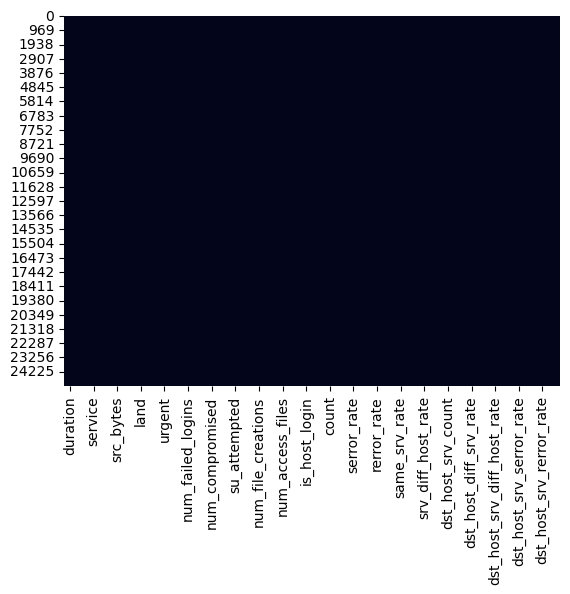

In [296]:
# Sous forme de carte thermique
sns.heatmap(df.isnull(), cbar=False)

In [297]:
# Données redondantes
MatrixCorrélations = df.corr()

In [298]:
# Trouver les paires de colonnes avec des corrélations (supérieures à 0,5)
CorrélationsPairs = []
for i in range(len(MatrixCorrélations.columns)):
    for j in range(i):
        if abs(MatrixCorrélations.iloc[i, j]) > 0.5:
            CorrélationsPairs.append((MatrixCorrélations.columns[i], MatrixCorrélations.columns[j]))

# Afficher les paires de colonnes avec des corrélations
for pair in CorrélationsPairs:
    print(pair)


('su_attempted', 'num_compromised')
('su_attempted', 'root_shell')
('num_root', 'num_compromised')
('num_root', 'su_attempted')
('num_access_files', 'num_compromised')
('num_access_files', 'su_attempted')
('num_access_files', 'num_root')
('is_guest_login', 'hot')
('count', 'logged_in')
('srv_serror_rate', 'serror_rate')
('srv_rerror_rate', 'rerror_rate')
('same_srv_rate', 'logged_in')
('same_srv_rate', 'count')
('same_srv_rate', 'serror_rate')
('same_srv_rate', 'srv_serror_rate')
('dst_host_count', 'same_srv_rate')
('dst_host_srv_count', 'logged_in')
('dst_host_srv_count', 'serror_rate')
('dst_host_srv_count', 'srv_serror_rate')
('dst_host_srv_count', 'same_srv_rate')
('dst_host_same_srv_rate', 'logged_in')
('dst_host_same_srv_rate', 'serror_rate')
('dst_host_same_srv_rate', 'srv_serror_rate')
('dst_host_same_srv_rate', 'same_srv_rate')
('dst_host_same_srv_rate', 'dst_host_count')
('dst_host_same_srv_rate', 'dst_host_srv_count')
('dst_host_serror_rate', 'serror_rate')
('dst_host_serror

<AxesSubplot:>

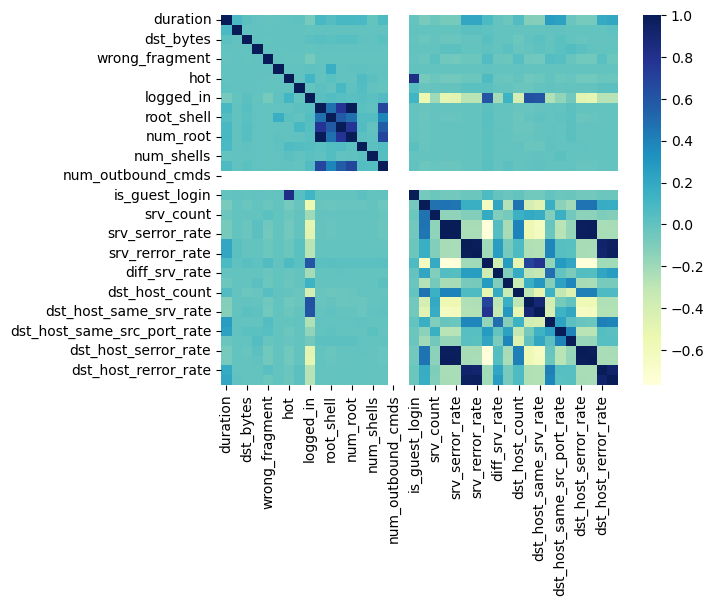

In [299]:
sns.heatmap(MatrixCorrélations, cmap="YlGnBu")

In [300]:
# Transformations des données
from sklearn.preprocessing import MinMaxScaler


In [301]:
dfNum = df.select_dtypes(include=['float64', 'int64'])
Scl = MinMaxScaler()
DfNorm = Scl.fit_transform(dfNum)

(array([2.4767e+04, 1.3100e+02, 9.0000e+01, 5.3000e+01, 2.6000e+01,
        1.8000e+01, 1.8000e+01, 2.1000e+01, 3.0000e+01, 3.8000e+01]),
 array([    0. ,  4286.2,  8572.4, 12858.6, 17144.8, 21431. , 25717.2,
        30003.4, 34289.6, 38575.8, 42862. ]),
 <BarContainer object of 10 artists>)

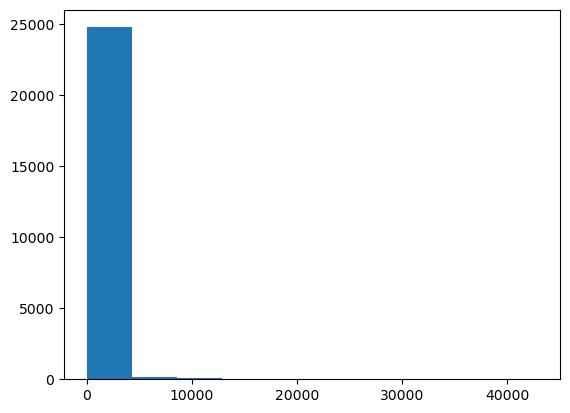

In [302]:
# Analyse de la distribution des données de la colonn duration
plt.hist(df['duration'])


<BarContainer object of 2 artists>

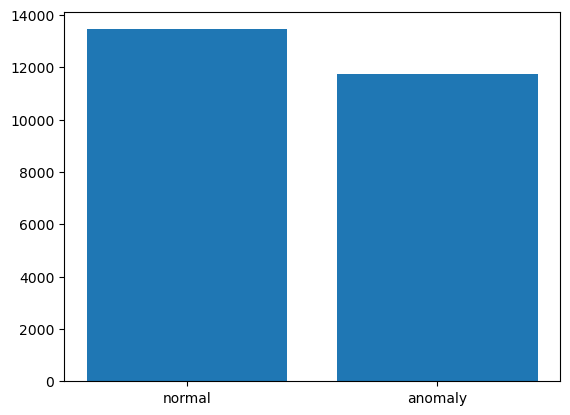

In [303]:
#  un déséquilibre dans les données 
plt.bar(df['class'].unique(), df['class'].value_counts())

# Quels sont les changements apportés aux données ?

1/ l'ajout de nouvelles paires de colonnes dans la phase 2 


# Est-ce que ce changement a un impact sur les performances du classificateur? Si oui, expliquez le changement en justifiant votre réponse.

oui,

# PHASE3

# Appliquez un algorithme d'apprentissage non supervisé sur le fichier Phase3.csv pour identifier les anomalies.

# Mesurez les performances de cet algorithme.

# Est-il possible de combiner vos travaux sur le fichier Phase3.csv et Phase2.csv afin d'obtenir un modèle robuste ? Si oui, proposez une approche et implémentez-la. Quelle sont les améliorations remarquées ?

# FIN